In [8]:
from astropy.table import Table
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from ltsfit.ltsfit import ltsfit

In [12]:
# load the GGL data tables with different sky areas of lenses bu galaxy population is on 10 deg^2
sky_area = "50.0v2"
GGL_data_table = Table.read(f"../data/GGL_{sky_area}_SQDEG_RED_DEFLECTOR_BLUE_SOURCE.fits", format='fits')
GGL_data_table

lens_id,z_D,z_S,theta_E,sigma_v_D,stellar_mass_D,mag_S_i,mag_S_r,mag_S_g,mag_S_z,mag_S_y,mag_D_i,mag_D_r,mag_D_g,mag_D_z,mag_D_y,size_D,e1_mass_D,e2_mass_D,e_mass_D,gamma_pl,R_e_kpc,Sigma_half_Msun/pc2,surf_bri_mag/arcsec2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
0,1.1395730540197462,2.721757883923871,0.6383209474735921,234.52827079090258,408649665972.69635,25.933963738373834,26.127290551620234,26.254675998006924,25.877372770610663,25.77967242684352,22.98925557393261,24.057250718125182,25.178428704908463,22.13937039113474,21.469667400192904,0.5236284022464591,-0.2185177432823041,0.0403576488557333,0.22221328481968317,2,4.30707590221643,6033.914441400326,26.23568913352215
1,1.1676192009673254,2.838231941243875,0.5428598143754139,215.84729996869848,324309245490.47504,24.22762289989987,24.307252461915994,24.330966194829777,24.19614120355442,24.25840995562706,23.4402925996813,24.481996698219838,25.35590571629431,22.647451548717875,21.931126586377424,0.2833098895986966,0.01249637671998382,-0.11601750873715334,0.11668856741216427,2,2.339785570397245,9636.754519164577,25.086016539203026
2,0.8496635018062778,3.3535717429740073,0.641000768077548,198.8149905902349,252718868917.48575,25.559769535693853,25.692328159661358,26.0026527226674,25.435595481739007,25.34701222772341,21.96306329205506,22.827566278001065,23.54640956678392,21.2303460229086,20.962437814004915,0.23774477841756192,0.0316484729535937,0.16867423476209303,0.17161766608619294,2,1.820585794159507,9782.545548619119,22.86143073655398
3,1.5030247928909466,2.1037429248665225,0.5111993143704567,314.13299407421005,883777743495.4609,26.510924542753955,26.70858277146902,27.1583892110041,26.131180343134147,25.81278128068294,23.77862974498593,25.346268769963384,26.00807169213301,22.905058039418602,22.357811050847626,1.4659095665465913,-0.009356050373493305,-0.025632148189255435,0.027286309742933265,2,12.406290085901004,3755.908492949182,29.310824741747
4,0.09931798255962809,2.1700020122674757,0.8909096122755212,182.91937545558415,192914100798.88678,26.068800062516363,26.18260302373776,26.453438870162888,25.85431274554333,25.597538901622872,15.682406808159396,16.184348056972592,17.024734167739563,15.371562734687448,15.1519986272104,1.8882089102964354,-0.03149400430312179,0.020689174501004406,0.03768174954242524,2,3.4613724155333387,993.0878825186128,20.86717108100093
5,0.5288078808555957,4.343158907234654,1.8475198758908336,295.8237930636839,760108618473.295,26.489822086076952,26.713722342261637,27.968750435273822,26.51430656934446,26.36029223477607,18.820681063983304,19.673589738103377,20.940708005983755,18.453013637031862,18.219862227367084,1.3974704615046138,-0.037506289136146086,0.029683186537268865,0.04783109122496046,2,8.783981475448723,4329.28295528526,24.12990678858026
6,1.4559015868937206,3.8947692755843875,0.6865247003713678,244.97777562316497,462966940487.00793,26.6810933315858,26.722212903637512,27.36112014871479,26.47404290286856,26.398807903193074,24.046814542508628,25.29251052208788,25.617233245782813,23.347386960561984,22.7428989776878,0.3386182857665169,-0.03450844210644334,-0.04499833975555973,0.056706993901727315,2,2.862031469438829,11700.201951750312,25.745941106562977
7,0.2806689195320025,1.7410928677555793,0.702790233640981,178.45741656564877,176660221028.014,26.85810971732381,27.019893227146323,27.191141500680875,26.537720058873933,26.28112734684412,18.536060330766365,19.020192408396266,20.210660912850745,18.275044840954653,18.081439214360305,0.5836787330604735,-0.10351118102632655,-0.293874446056699,0.31157142783412706,2,2.481363853666704,2908.161559314505,21.745803937276175
8,0.7706303273274793,4.211551756362357,0.9218938814173087,225.27783876034175,365843003536.67883,26.207415223007033,26.463795844134502,27.56823350434354,26.10852487865217,25.982309600016222,21.08702338199977,22.261540879019485,23.52052383691099,20

sig_int:     0.0000  297757812641.3630
Computing sig_int
sig_int:     0.0000  297757812641.3623
sig_int:     0.0606     -0.0679
sig_int:     0.0605     -0.0670
sig_int:     0.0584      0.0038
sig_int:     0.0585     -0.0002
sig_int:     0.0584      0.0008
Computing sig_int error
sig_int:     0.0585      0.0200
sig_int:     0.0606     -0.0476
sig_int:     0.0591     -0.0007
sig_int:     0.0591      0.0002
Repeating at best fitting solution
sig_int:     0.0585     -0.0002

################# Values and formal errors ################

        a =  2.1763 +/- 0.0041
      b_0 =  0.3679 +/- 0.0043
      b_1 =  -0.0377 +/- 0.0019
  scatter =  0.05847 +/- 0.00059
Observed rms scatter: 0.0585
y = a + (x_0 - p_0) b_0 + (x_1 - p_1) b_1
   p_0 = 0.000
   p_1 = 0.000
Adopted clip = 5.00*sigma; Fitted/Clipped = 4880/0
Non-clipped Spearman r = 0.82 and p = 0.0
Non-clipped Pearson r = 0.83 and p = 0.0
Execution time 9.69 s

###########################################################

Best fitting para

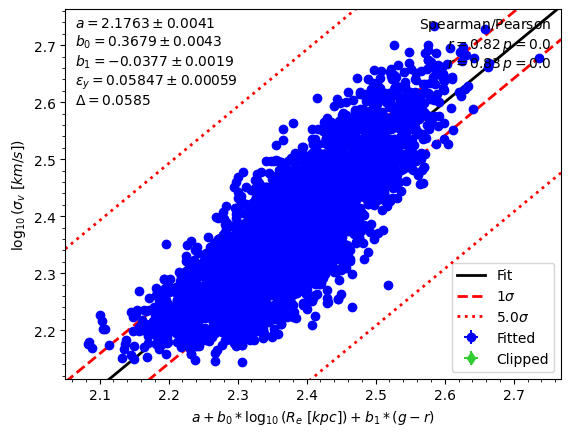

In [35]:
x1 = np.log10(GGL_data_table["R_e_kpc"])
x2 = GGL_data_table["mag_D_g"] - GGL_data_table["mag_D_r"]
y = np.log10(GGL_data_table["sigma_v_D"])

#arrays
x1, x2, y = np.array(x1), np.array(x2), np.array(y)

x = np.column_stack([x1, x2])
sigx = np.ones_like(x)*0.0000001
sigy = np.ones_like(y)*0.0000001  # Example uncertainty for y

p = ltsfit(x, y, sigx, sigy, corr=True, epsy=True, clip=5,
           frac=None, label='Fitted',
           legend=True,plot=True, text=True)

print(f"Best fitting parameters: {p.coef}")
print(f"Scatter in log sigma_v: {p.sig_int} dex")
print(f"Scatter in sigma_v: {p.sig_int*np.log(10)*100:.2f} %")

# change x and y labels
plt.xlabel('$a + b_0*\\log_{10}(R_e \\ [kpc]) + b_1*(g-r)$')
plt.ylabel('$\\log_{10}(\\sigma_v \\ [km/s])$');


sig_int:     0.0000  241678242.7997
Computing sig_int
sig_int:     0.0000  241678242.7377
sig_int:     0.0017     -0.0671
sig_int:     0.0017     -0.0661
sig_int:     0.0017      0.0037
sig_int:     0.0017     -0.0002
sig_int:     0.0017      0.0008
Computing sig_int error
sig_int:     0.0017      0.0239
sig_int:     0.0017     -0.0429
sig_int:     0.0017     -0.0008
sig_int:     0.0017      0.0002
Repeating at best fitting solution
sig_int:     0.0017     -0.0002

################# Values and formal errors ################

        a =  -1.9737 +/- 0.0022
      b_0 =  0.0001 +/- 0.00025
      b_1 =  0.37419 +/- 0.00020
  scatter =  0.001661 +/- 2.0e-05
Observed rms scatter: 0.00166
y = a + (x_0 - p_0) b_0 + (x_1 - p_1) b_1
   p_0 = 0.000
   p_1 = 0.000
Adopted clip = 2.60*sigma; Fitted/Clipped = 3438/1442
Non-clipped Spearman r = 1.0 and p = 0.0
Non-clipped Pearson r = 1.0 and p = 0.0
Execution time 8.98 s

###########################################################

Best fitting para

Text(0, 0.5, '$\\log_{10}(\\sigma_v \\ [km/s])$')

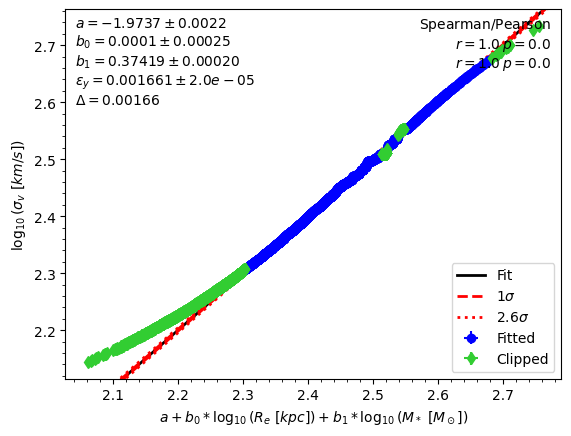

In [29]:
x1 = np.log10(GGL_data_table["R_e_kpc"])
x2 = np.log10(GGL_data_table["stellar_mass_D"])
y = np.log10(GGL_data_table["sigma_v_D"])

#arrays
x1, x2, y = np.array(x1), np.array(x2), np.array(y)

x = np.column_stack([x1, x2])
sigx = np.ones_like(x)*0.0000001
sigy = np.ones_like(y)*0.0000001  # Example uncertainty for y

p = ltsfit(x, y, sigx, sigy, corr=True, epsy=True, clip = 2.6,
           frac=None, label='Fitted',
           legend=True,plot=True, text=True)

print(f"Best fitting parameters: {p.coef}")
print(f"Scatter in log sigma_v: {p.sig_int} dex")
print(f"Scatter in sigma_v: {p.sig_int*np.log(10)*100:.2f} %")


plt.xlabel('$a + b_0*\\log_{10}(R_e \\ [kpc]) + b_1*\\log_{10}(M_* \\ [M_\\odot])$')
plt.ylabel('$\\log_{10}(\\sigma_v \\ [km/s])$')

Text(0, 0.5, '$\\log(\\sigma_v \\ [km/s])$')

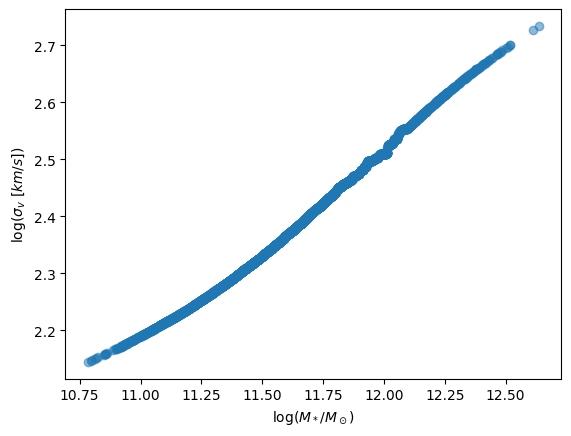

In [30]:
plt.plot(
    np.log10(GGL_data_table['stellar_mass_D']),
    np.log10(GGL_data_table['sigma_v_D']),
    'o', alpha=0.5, label='Data'
)
plt.xlabel('$\\log(M_*/M_\\odot)$')
plt.ylabel('$\\log(\\sigma_v \\ [km/s])$')

sig_int:     0.0000  308641031683.0364
Computing sig_int
sig_int:     0.0000  308641031683.0419
sig_int:     0.0614     -0.0753
sig_int:     0.0614     -0.0744
sig_int:     0.0589      0.0048
sig_int:     0.0591     -0.0003
sig_int:     0.0591      0.0007
Computing sig_int error
sig_int:     0.0591      0.0200
sig_int:     0.0614     -0.0550
sig_int:     0.0597     -0.0009
sig_int:     0.0597      0.0001
Repeating at best fitting solution
sig_int:     0.0591     -0.0003

################# Values and formal errors ################

        a =  1.914 +/- 0.013
      b_0 =  0.3357 +/- 0.0057
      b_1 =  0.0100 +/- 0.00061
  scatter =  0.05909 +/- 0.00060
Observed rms scatter: 0.0591
y = a + (x_0 - p_0) b_0 + (x_1 - p_1) b_1
   p_0 = 0.000
   p_1 = 0.000
Adopted clip = 5.00*sigma; Fitted/Clipped = 4880/0
Non-clipped Spearman r = 0.82 and p = 0.0
Non-clipped Pearson r = 0.83 and p = 0.0
Execution time 9.63 s

###########################################################

Best fitting parame

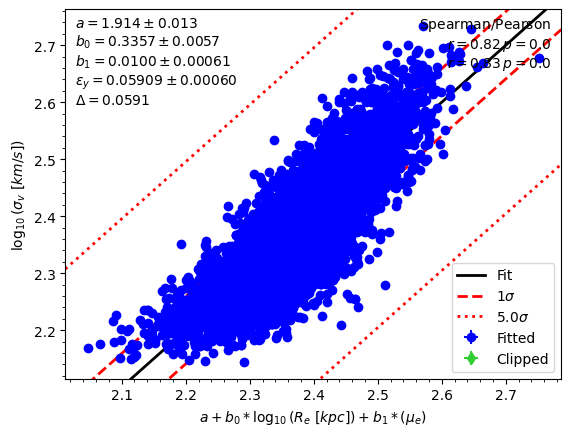

In [34]:
x1 = np.log10(GGL_data_table["R_e_kpc"])
x2 = GGL_data_table["surf_bri_mag/arcsec2"]  # mu_e
y = np.log10(GGL_data_table["sigma_v_D"])

#arrays
x1, x2, y = np.array(x1), np.array(x2), np.array(y)

x = np.column_stack([x1, x2])
sigx = np.ones_like(x)*0.0000001
sigy = np.ones_like(y)*0.0000001  # Example uncertainty for y

p = ltsfit(x, y, sigx, sigy, corr=True, epsy=True, clip=5,
           frac=None, label='Fitted',
           legend=True,plot=True, text=True)

print(f"Best fitting parameters: {p.coef}")
print(f"Scatter in log sigma_v: {p.sig_int} dex")
print(f"Scatter in sigma_v: {p.sig_int*np.log(10)*100:.2f} %")

# change x and y labels
plt.xlabel('$a + b_0*\\log_{10}(R_e \\ [kpc]) + b_1*(\\mu_e)$')
plt.ylabel('$\\log_{10}(\\sigma_v \\ [km/s])$');
